# Financial Services Use In Tanzania


In [1]:
# loading modules
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
# reading csv
mob_mon= pd.read_csv('training.csv')
mob_mon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 37 columns):
ID                             7094 non-null int64
Q1                             7094 non-null int64
Q2                             7094 non-null int64
Q3                             7094 non-null int64
Q4                             7094 non-null int64
Q5                             7094 non-null int64
Q6                             7094 non-null int64
Q7                             7094 non-null int64
Q8_1                           7094 non-null int64
Q8_2                           7094 non-null int64
Q8_3                           7094 non-null int64
Q8_4                           7094 non-null int64
Q8_5                           7094 non-null int64
Q8_6                           7094 non-null int64
Q8_7                           7094 non-null int64
Q8_8                           7094 non-null int64
Q8_9                           7094 non-null int64
Q8_10                     

In [3]:
#missing values
missing_values = mob_mon.isnull().sum().sum()
print('Number of missing values:',missing_values) 


Number of missing values: 0


In [4]:
summary = mob_mon.describe()
summary = summary.transpose()
summary.head()

count         mean          std   min      25%     50%     75%     max
ID  7094.0  4742.627291  2731.120086   1.0  2397.25  4744.5  7105.0  9459.0
Q1  7094.0    38.239498    16.332148  16.0    25.00    35.0    48.0   100.0
Q2  7094.0     1.559910     0.496433   1.0     1.00     2.0     2.0     2.0
Q3  7094.0     1.787426     1.165160   1.0     1.00     1.0     3.0     4.0
Q4  7094.0     3.060051     1.557779   1.0     2.00     3.0     3.0     8.0

In [5]:
males = mob_mon[mob_mon.Q2 == 1]

In [6]:
females = mob_mon[mob_mon.Q2 == 2]

In [7]:
f1 = len(females[females.mobile_money == 1])
f2 = len(females[females.mobile_money == 0])
f = f1 + f2
print('Females with Mobile Money:',f1)
print('Females without Mobile Money:',f2)
print('Total number of females:',f)

Females with Mobile Money: 1971
Females without Mobile Money: 2001
Total number of females: 3972


In [8]:
m1 = len(males[males.mobile_money == 1])
m2 = len(males[males.mobile_money == 0]) 
m = m1 + m2
print('Males with Mobile Money:',m1)
print('Males without Mobile Money:',m2)
print('Total number of males:',m)

Males with Mobile Money: 1959
Males without Mobile Money: 1163
Total number of males: 3122


In [9]:
average_male_age = males[males.mobile_money == 1].Q1.mean()
print(average_male_age)

37.12404287901991


In [10]:
average_female_age = females[females.mobile_money == 1].Q1.mean()
print( average_female_age)

35.531709791983765


In [11]:
#age
without_mob_mon = mob_mon[mob_mon.mobile_money == 0]
with_mob_mon = mob_mon[mob_mon.mobile_money == 1]



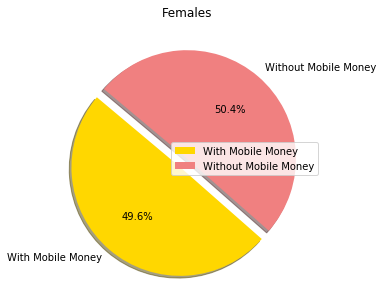

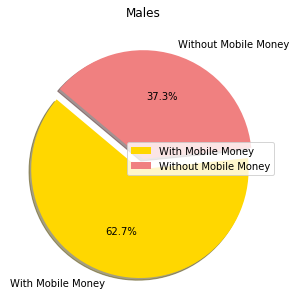

In [35]:
# For females
# Calculate piechart sizes
fmm = f1 / f * 100
fwmm = f2/f * 100

# Define the piechart
plt.figure(figsize=(10,5))
labels = ['With Mobile Money','Without Mobile Money']
sizes = [fmm,fwmm]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)

# Plot the pie chart
plt.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Females')

# For males
# Calculate piechart sizes
mmm = m1 / m * 100
mwmm = m2/m * 100

# Define the piechart
plt.figure(figsize=(10,5))
labels = ['With Mobile Money','Without Mobile Money']
sizes = [mmm,mwmm]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)

# Plot the pie chart
plt.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Males')
plt.show()

NameError: name 'means_frank' is not defined

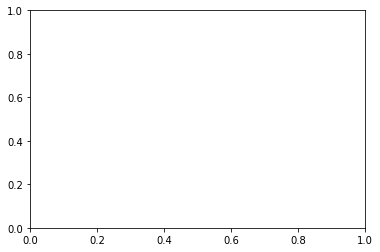

In [36]:
# data to plot
n_groups = 4
male= (90, 55, 40, 65)
female= (85, 62, 54, 20)

# create plot
fig, ax = plt.subplots()
index = np.arange(7094)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='pink',
label='Frank')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='coral blue',
label='Guido')

plt.xlabel('Gender')
plt.ylabel('frequency')
plt.title('Comparison')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D'))
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
import sys
#!{sys.executable} -m pip install folium --user
import folium
from geopy.geocoders import Nominatim
from folium.plugins import MarkerCluster

In [14]:
mob_mon_incomes = mob_mon[["Q8_1" ,"Q8_2","Q8_3","Q8_4","Q8_5","Q8_6","Q8_7","Q8_8","Q8_9","Q8_10","Q8_11"]] 

income_type = {
    "Q8_1":'Salaries/wages',
    "Q8_2":'trading/selling',
    "Q8_3":'service',
    "Q8_4":'Piece work/Casual labor/Occasional jobs',
    "Q8_5":'Rental income',
    "Q8_6":'Interest',
    "Q8_7":'Pension',
    "Q8_8":'Social welfare money/grant from Government',
    "Q8_9":'Rely on someone',
    "Q8_10":'Don’t get money',
    "Q8_11": 'Other'
}

for column,label in income_type.items():
    mob_mon_incomes[column] = [label if each ==1 else 'none' for each in mob_mon_incomes[column]]
mob_mon_incomes.head(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Q8_1  Q8_2  Q8_3  Q8_4  Q8_5  Q8_6  Q8_7  Q8_8             Q8_9 Q8_10 Q8_11
0  none  none  none  none  none  none  none  none  Rely on someone  none  none

In [15]:
x = [1,2,3,2,2,2,3,4]
def remove_none(whatever):
    return [x for x in whatever if x != "none"]

income = []
for index, row in mob_mon_incomes.iterrows():
    # this will give you a list of values in your row.
    row = list(row)

    # you want to remove all "none" values from your list.
    nfl = remove_none(row)

    # *if* your list is empty after the process of elimination, you want to append "No income".
    if len(nfl) == 0:
        nfl.append("No income")
    
    income.append(nfl)

mob_mon['income type'] = income

In [16]:
# mob_mon = mob_mon.head(50)

In [17]:
# Creating a map for tanzania.
lat = -6.3728253; 
lon = 34.8924826
income_type_map = folium.Map(location = [lat, lon], zoom_start = 5)
marker_cluster = MarkerCluster().add_to(income_type_map)

# add markers to map
for lat, lng, label in zip(mob_mon['Latitude'], mob_mon['Longitude'], 
                           mob_mon['income type']):
    label = folium.Popup(str(label), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='#3386cc',
        fill_opacity=0.7,
        parse_html=False).add_to(marker_cluster)  

income_type_map


In [18]:
for x in mob_mon.head()['income type']:
    print(type(str(x)))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
